# Data Import

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Import train and test data
train = pd.read_csv("/kaggle/input/playground-series-s5e3/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s5e3/test.csv").fillna(0)

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.5 KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             730 non-null    int64  
 1   day            730 non-null    int64  
 2   pressure       730 non-null    float64
 3   maxtemp        730 non-null    float64
 4   temparature    730 non-null    float64
 5   mintemp        730 non-null    float64
 6   dewpoint       730 non-null    float64
 7   humidity       730 non-null    float64
 8   cloud          730 non-null    float64
 9   sunshine       730 non-null    float64
 10  winddirection  730 non-null    float64
 11  windspeed      730 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 68.6 KB


In [5]:
train.sample(5)

id  day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  \
628    628  264    1015.7     29.0         26.9     24.8      20.0      76.0   
363    363  364    1022.2     17.6         16.5     15.7      13.8      76.0   
1944  1944  120    1008.0     27.9         27.8     26.4      25.0      89.0   
2137  2137  313    1014.8     21.3         20.4     18.0      18.4      86.0   
1490  1490   31    1013.9     20.9         20.6     19.4      19.9      73.0   

      cloud  sunshine  winddirection  windspeed  rainfall  
628    49.0      10.8           60.0       14.3         0  
363    97.0       0.0           60.0       29.8         1  
1944   88.0       1.0          130.0       18.4         1  
2137   84.0       0.2           80.0       26.5         1  
1490   83.0       2.0           70.0       14.8         0

# EDA

In [6]:
# Basic overview of numerical data
train.describe()

id          day     pressure      maxtemp  temparature  \
count  2190.000000  2190.000000  2190.000000  2190.000000  2190.000000   
mean   1094.500000   179.948402  1013.602146    26.365799    23.953059   
std     632.342866   105.203592     5.655366     5.654330     5.222410   
min       0.000000     1.000000   999.000000    10.400000     7.400000   
25%     547.250000    89.000000  1008.600000    21.300000    19.300000   
50%    1094.500000   178.500000  1013.000000    27.800000    25.500000   
75%    1641.750000   270.000000  1017.775000    31.200000    28.400000   
max    2189.000000   365.000000  1034.600000    36.000000    31.500000   

           mintemp     dewpoint     humidity        cloud     sunshine  \
count  2190.000000  2190.000000  2190.000000  2190.000000  2190.000000   
mean     22.170091    20.454566    82.036530    75.721918     3.744429   
std       5.059120     5.288406     7.800654    18.026498     3.626327   
min       4.000000    -0.300000    39.000000     2.000000     0.000000   
25%      17.700000    16.800000    77.000000    69.000000     0.400000   
50%      23.850000    22.150000    82.000000    83.000000     2.400000   
75%      26.400000    25.000000    88.000000    88.000000     6.800000   
max      29.800000    26.700000    98.000000   100.000000    12.100000   

       winddirection    windspeed     rainfall  
count    2190.000000  2190.000000  2190.000000  
mean      104.863151    21.804703     0.753425  
std        80.002416     9.898659     0.431116  
min        10.000000     4.400000     0.000000  
25%        40.000000    14.125000     1.000000  
50%        70.000000    20.500000     1.000000  
75%       200.000000    27.900000     1.000000  
max       300.000000    59.500000     1.000000

## Visualization

In [7]:
# Import visualization libraries
import plotly.graph_objects as go
import seaborn as sns

In [8]:
# Univariate Analysis
fig = go.Figure()
fig.add_traces([go.Box(y=train['maxtemp'], name='Max Temperature'),go.Violin(y=train['maxtemp'], name='Max Temperature')])
fig.add_traces([go.Violin(y=train['temparature'], name='Avg Temperature'),go.Box(y=train['temparature'], name='Avg Temperature')])
fig.add_traces([go.Violin(y=train['mintemp'], name='Min Temperature'),go.Box(y=train['mintemp'], name='Min Temperature')])
fig.update_layout(title='Min, Avg and Max temperature distribution', title_x=0.5)
fig.show()

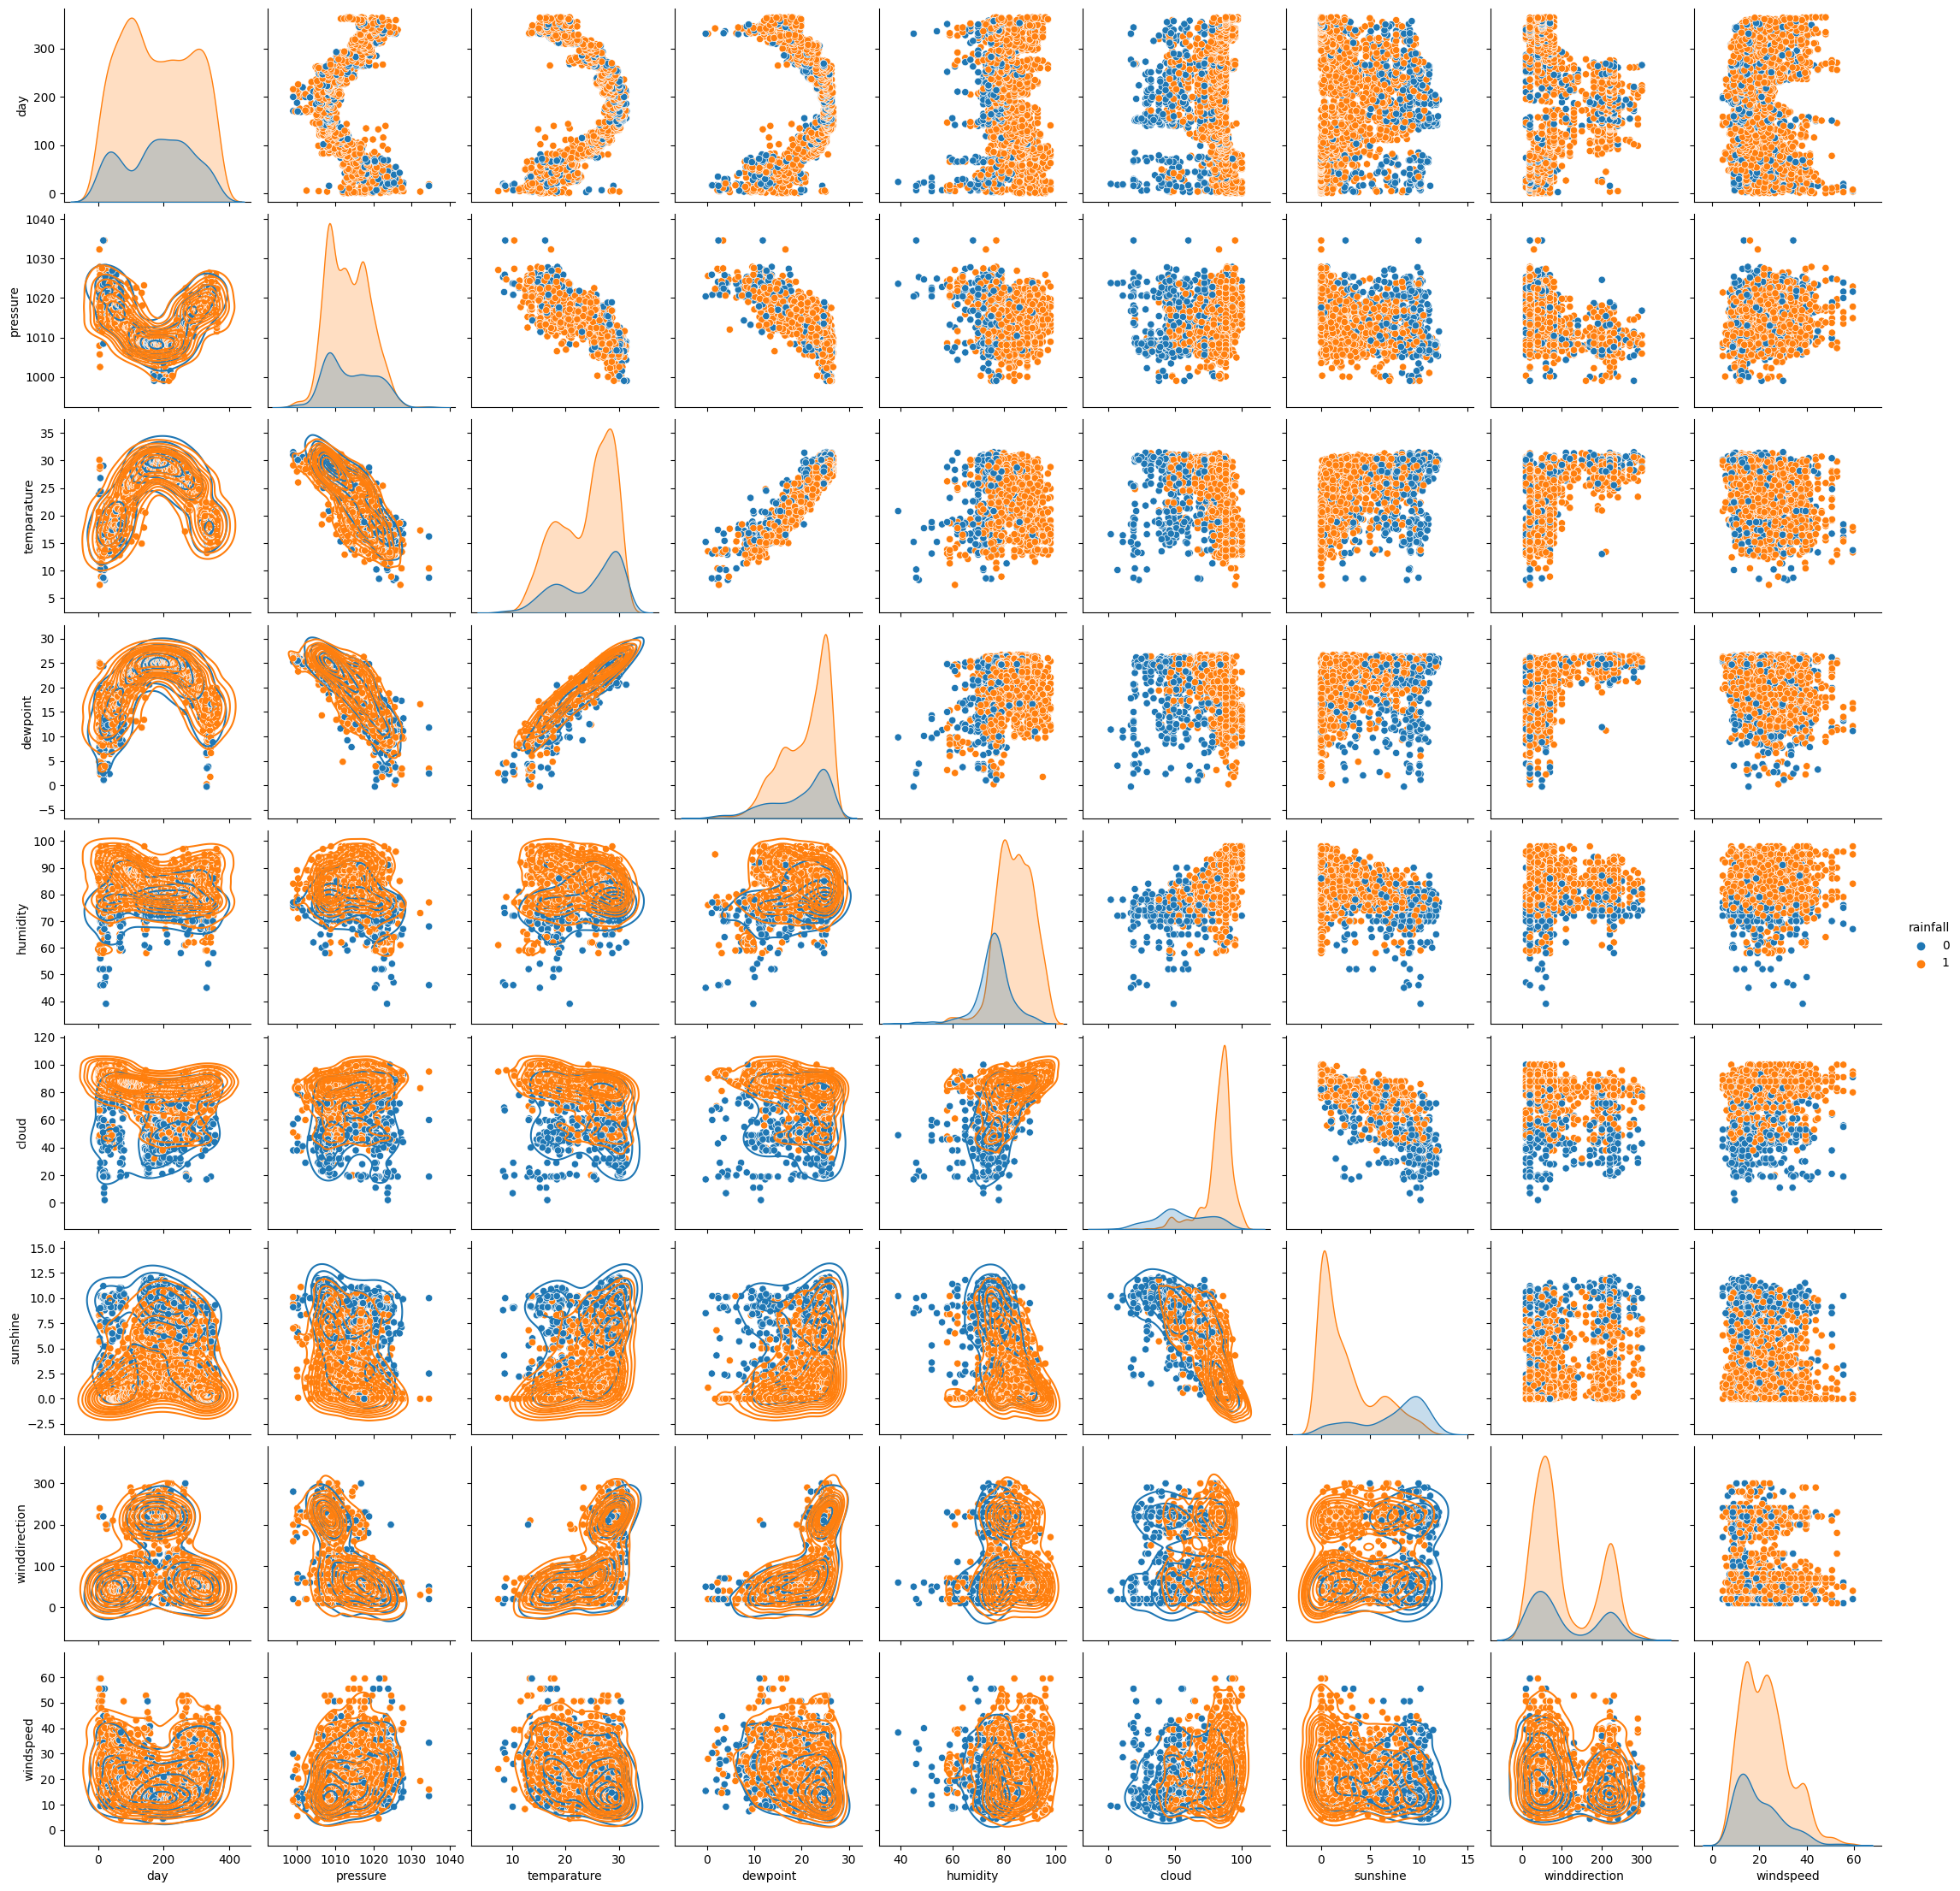

In [9]:
cols = ['day', 'pressure', 'temparature', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection','windspeed']
pair = sns.pairplot(data=train, hue='rainfall', diag_kind='kde', x_vars=cols, y_vars=cols)
pair.map_lower(sns.kdeplot, levels=10, color=".2")

In [10]:
# Pie chart for rainfall days distribution
fig=go.Figure()
fig.add_trace(go.Pie(labels=train.rainfall.value_counts().index, values=train.rainfall.value_counts().values))
fig.update_layout(title='Rainfall days proportion', title_x=0.5)
fig.show()

In [11]:
# Correlation Heatmap
fig = go.Figure()
fig.add_trace(go.Heatmap(z=train.corr(), x=train.corr().columns, y=train.corr().index))
fig.update_layout(width=800, height=800, title='Features correlation Heatmap', title_x=0.5)
fig.show()

# Data Preperation

In [12]:
# Feature Selection (Drop unnecessary features)
from sklearn.feature_selection import mutual_info_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor

drop_columns = ['id']

X = train.drop(columns=drop_columns)  # Features
y = np.array(train['rainfall'], dtype=int)                 # Target variable

# Compute mutual information
mi_scores = mutual_info_classif(X, y, discrete_features='auto')

# Show results
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by="MI Score", ascending=False)

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(pd.merge(mi_df, vif_data, how='left'))

          Feature  MI Score          VIF
0        rainfall  0.559683     7.328686
1           cloud  0.212895    66.948431
2        sunshine  0.168999     7.466904
3        humidity  0.134393   206.110472
4             day  0.065629     4.155342
5         maxtemp  0.025201   751.950327
6     temparature  0.024030  1825.813091
7         mintemp  0.019311   919.312192
8        dewpoint  0.012183   188.000588
9       windspeed  0.011476     6.837256
10       pressure  0.008909   266.904764
11  winddirection  0.000000     5.084439


In [13]:
# Drop temperature column
from sklearn.feature_selection import mutual_info_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor

drop_columns = ['id', 'temparature']

X = train.drop(columns=drop_columns)  # Features
y = np.array(train['rainfall'], dtype=int)                 # Target variable

# Compute mutual information
mi_scores = mutual_info_classif(X, y, discrete_features='auto')

# Show results
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by="MI Score", ascending=False)

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(pd.merge(mi_df, vif_data, how='left'))

          Feature  MI Score         VIF
0        rainfall  0.558770    7.327200
1           cloud  0.214893   66.912221
2        sunshine  0.176465    7.448074
3        humidity  0.129095  205.973310
4             day  0.072928    4.155181
5         maxtemp  0.023085  410.567126
6         mintemp  0.022726  474.028548
7        dewpoint  0.021639  183.619084
8       windspeed  0.015555    6.836908
9   winddirection  0.006706    5.077042
10       pressure  0.006502  265.556066


In [14]:
# Drop mintemp, maxtemp column
from sklearn.feature_selection import mutual_info_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor

drop_columns = ['id', 'temparature', 'mintemp', 'maxtemp']

X = train.drop(columns=drop_columns)  # Features
y = np.array(train['rainfall'], dtype=int)                 # Target variable

# Compute mutual information
mi_scores = mutual_info_classif(X, y, discrete_features='auto')

# Show results
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by="MI Score", ascending=False)

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(pd.merge(mi_df, vif_data, how='left'))

         Feature  MI Score         VIF
0       rainfall  0.558770    7.318586
1          cloud  0.207849   66.791490
2       sunshine  0.165779    7.072827
3       humidity  0.139740  196.078688
4            day  0.066866    4.111951
5       dewpoint  0.028108   34.550688
6  winddirection  0.014058    4.855205
7       pressure  0.004413  213.043517
8      windspeed  0.000000    6.749191


In [15]:
# Drop pressure column
from sklearn.feature_selection import mutual_info_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor

drop_columns = ['id', 'temparature', 'mintemp', 'maxtemp', 'pressure']

X = train.drop(columns=drop_columns)  # Features
y = np.array(train['rainfall'], dtype=int)                 # Target variable

# Compute mutual information
mi_scores = mutual_info_classif(X, y, discrete_features='auto')

# Show results
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by="MI Score", ascending=False)

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(pd.merge(mi_df, vif_data, how='left'))

         Feature  MI Score        VIF
0       rainfall  0.559226   7.207907
1          cloud  0.215684  58.794282
2       sunshine  0.154921   4.535855
3       humidity  0.124681  86.209390
4            day  0.070814   4.009019
5       dewpoint  0.027437  34.513120
6      windspeed  0.009867   6.414420
7  winddirection  0.000000   4.828891


In [16]:
# Split data into train + validation and then scale them along with test data
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler

drop_columns = ['id', 'temparature', 'mintemp', 'maxtemp', 'pressure', 'rainfall']
X = train.drop(columns=drop_columns)
y = np.array(train['rainfall'], dtype=int)

X_train, X_val, y_train, y_val = tts(X, y, test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

X_test = test.drop(columns=drop_columns, errors='ignore')
X_test = scaler.transform(X_test)

In [17]:
# Get Basic idea of class weights to tackle problem of imballancing
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight='balanced', 
                                     classes=np.unique(y_train), 
                                     y=y_train)

class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}
class_weights_dict

{0: 2.023094688221709, 1: 0.6641394996209249}

# Model Training

In [18]:
# Import model traing package
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [19]:
X_train.shape

(1752, 7)

In [20]:
# Define Model Layers
inputs = Input(shape=(X_train.shape[1], ), name='InputLayer')
layer1 = Dense(32, activation='relu', name='Layer1', kernel_regularizer=regularizers.l1(0.001))(inputs)
layer1 = BatchNormalization()(layer1)
#layer1 = Dropout(0.3)(layer1)

layer2 = Dense(32, activation='relu', name='Layer2', kernel_regularizer=regularizers.l1(0.001))(layer1)
layer2 = BatchNormalization()(layer2)
#layer2 = Dropout(0.3)(layer2)

layer3 = Dense(16, activation='relu', name='Layer3', kernel_regularizer=regularizers.l1(0.001))(layer2)
layer3 = BatchNormalization()(layer3)

layer4 = Dense(8, activation='relu', name='Layer4', kernel_regularizer=regularizers.l1(0.001))(layer3)
layer4 = BatchNormalization()(layer4)

outputs = Dense(1, activation='sigmoid', name='OutputLayer')(layer4)

model = Model(inputs=inputs, outputs=outputs)

# Define the callback to early stopping and save the best model based on validation loss
early_stopping = EarlyStopping(monitor='val_AUC', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint(filepath='best_model.keras',
                             monitor='val_AUC',
                             save_best_only=True,
                             mode='max',
                             verbose=1)

# Define model compilation parameters
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', 'AUC', 'precision', 'recall'])

In [21]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ InputLayer (InputLayer)              │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Layer1 (Dense)                       │ (None, 32)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Layer2 (Dense)                       │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Layer3 (Dense)                       │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Layer4 (Dense)                       │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 8)                   │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ OutputLayer (Dense)                  │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,337 (9.13 KB)

 Trainable params: 2,161 (8.44 KB)

 Non-trainable params: 176 (704.00 B)

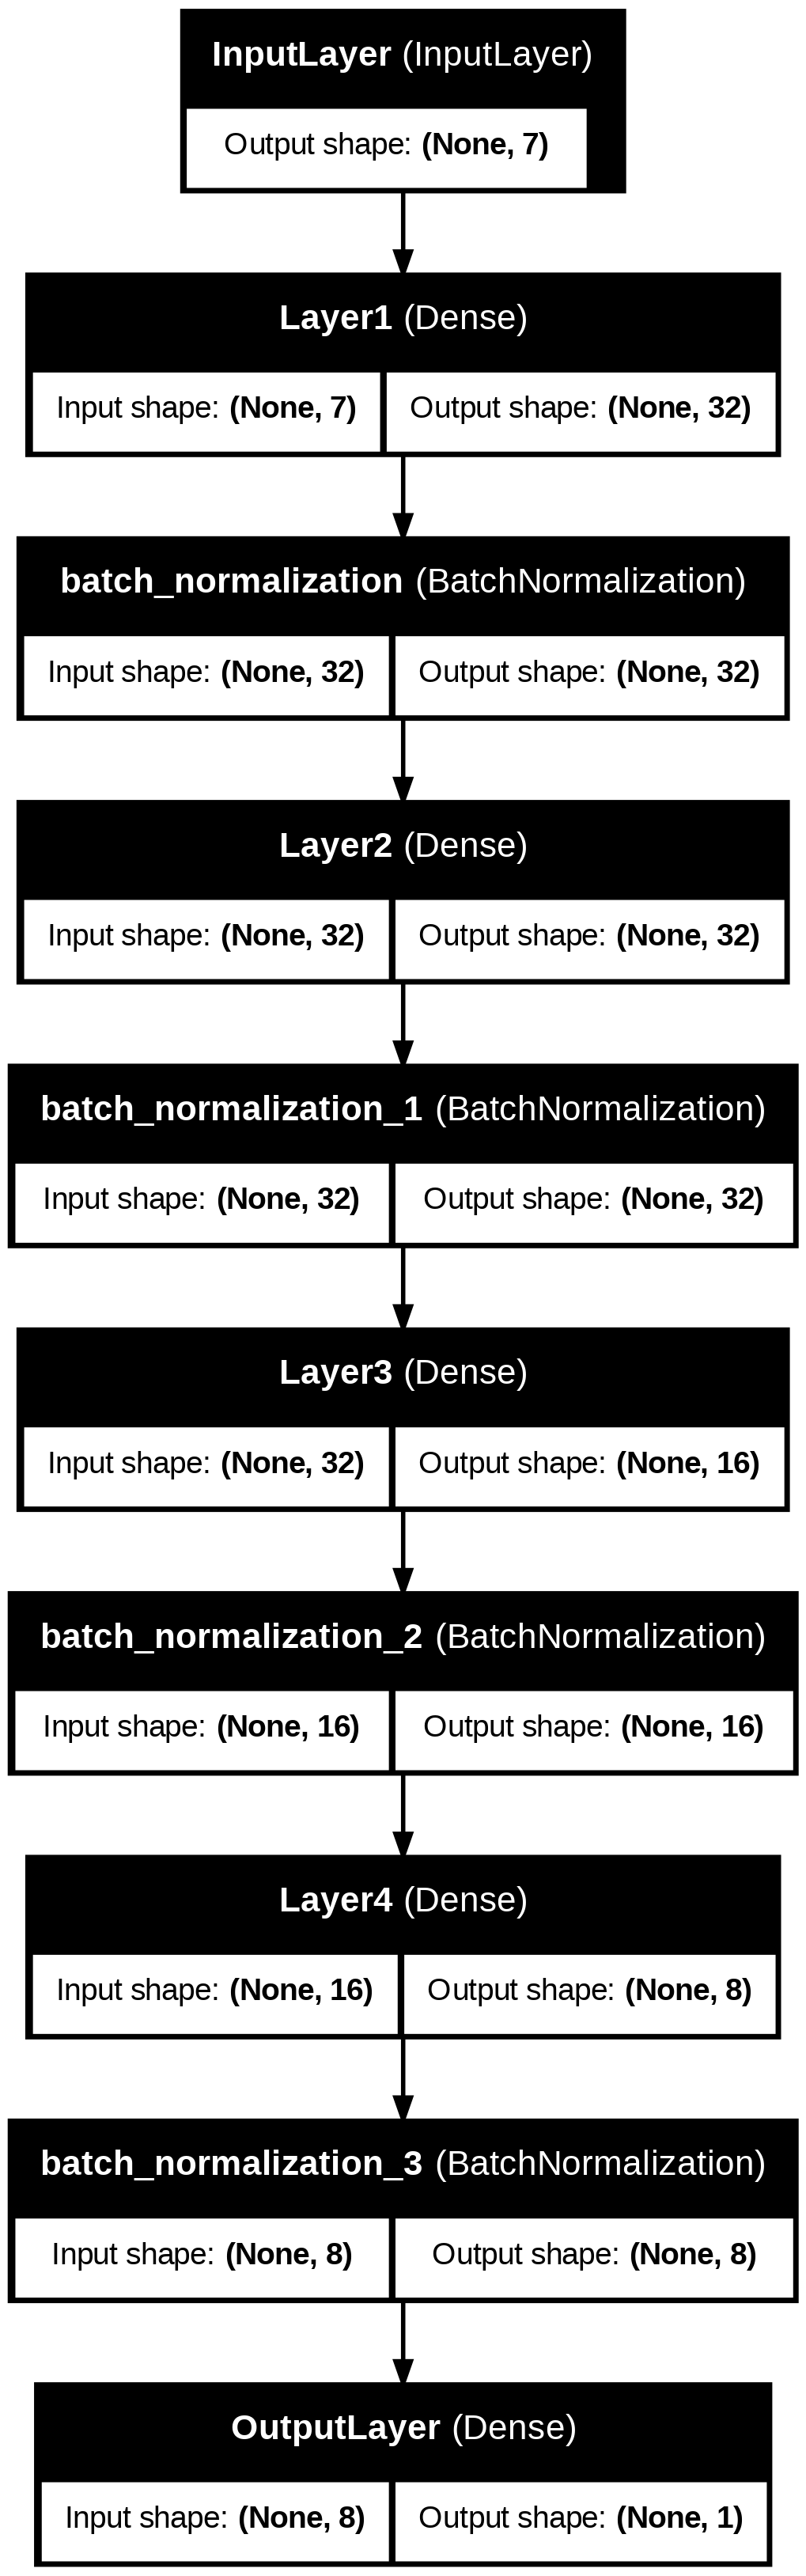

In [22]:
from tensorflow.keras.utils import plot_model

plot_model(model, 
    to_file='model.png', 
    show_shapes=True, show_layer_names=True)

In [23]:
# Train Model
history = model.fit(x=X_train, y=y_train, epochs=200, batch_size=32, verbose=1,
                    validation_data=(X_val, y_val),
                    class_weight={0: 1.056338028169014, 1: 0.8606334841628959},
                    callbacks=[early_stopping, checkpoint])

Epoch 1/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 0.5975 - accuracy: 0.5805 - loss: 0.9612 - precision: 0.7945 - recall: 0.5905
Epoch 1: val_AUC improved from -inf to 0.84969, saving model to best_model.keras
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 73ms/step - AUC: 0.5998 - accuracy: 0.5820 - loss: 0.9598 - precision: 0.7956 - recall: 0.5919 - val_AUC: 0.8497 - val_accuracy: 0.8402 - val_loss: 0.8825 - val_precision: 0.8462 - val_recall: 0.9637
Epoch 2/200
52/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.8597 - accuracy: 0.8148 - loss: 0.7536 - precision: 0.9131 - recall: 0.8296
Epoch 2: val_AUC improved from 0.84969 to 0.87675, saving model to best_model.keras
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.8592 - accuracy: 0.8150 - loss: 0.7535 - precision: 0.9129 - recall: 0.8304 - val_AUC: 0.8768 - val_accuracy: 0.8516 - val_loss: 0.7889 - val_precision: 0.8778 - val_recall: 0.9335
Epoch 3/200
51/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.8784 - accuracy: 0.8399 - loss: 0.7032 - pr

# Test Data Prediction and Submission

In [24]:
from tensorflow.keras.models import load_model

# Load the best model
best_model = load_model('best_model.keras')
best_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'AUC', 'precision', 'recall'])

In [25]:
from sklearn.metrics import roc_curve

y_pred_prob = best_model.predict(X_val)
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)

# Find the optimal threshold (maximizing TPR - FPR)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold:.4f}")


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
Optimal Threshold: 0.6060


In [26]:
result = pd.DataFrame({'id':test['id'],'rainfall':(best_model.predict(X_test).flatten())})
result.to_csv('submission.csv', index=False)
print(result.head())

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
     id  rainfall
0  2190  0.851676
1  2191  0.844497
2  2192  0.766418
3  2193  0.029983
4  2194  0.020013


In [27]:
result.isna().sum()

id          0
rainfall    0
dtype: int64